<a href="https://colab.research.google.com/github/GMAC1231/Cars-and-Bikes/blob/main/22f23591_AI_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
#My dataset is available in googledrive; so I am accessing my drive from colab
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
#Once this is executed, you will see your drive appearing on the left hand side

Mounted at /content/drive


In [23]:
# Define paths to the dataset
train_dir = '/content/drive/MyDrive/Cars and Bikes/Cars and Bikes/train'  # Update with your actual path
test_dir = '/content/drive/MyDrive/Cars and Bikes/Cars and Bikes/test'    # Update with your actual path

In [31]:
import os
print(len(os.listdir('/content/drive/MyDrive/Cars and Bikes/Cars and Bikes/test/Car')))
print(len(os.listdir('/content/drive/MyDrive/Cars and Bikes/Cars and Bikes/train/Car')))
print(len(os.listdir('/content/drive/MyDrive/Cars and Bikes/Cars and Bikes/test/Bike')))
print(len(os.listdir('/content/drive/MyDrive/Cars and Bikes/Cars and Bikes/train/Bike')))

500
400
489
400


In [32]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator for training set
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Split 20% of the images for validation
)

# Load and prepare training data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # 'binary' for binary classification (Car vs. Bike)
    subset='training'  # Specify 'training' for the training set
)

# Create ImageDataGenerator for validation set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Note: Using the same validation split as in the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'  # Specify 'validation' for the validation set
)

Found 640 images belonging to 2 classes.
Found 160 images belonging to 2 classes.


In [33]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [34]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))  #output layer

In [35]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [36]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 230s 9s/step - accuracy: 0.5183 - loss: 1.2254 - val_accuracy: 0.6750 - val_loss: 0.6451
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 211ms/step - accuracy: 0.7977 - loss: 0.5488 - val_accuracy: 0.7312 - val_loss: 0.5724
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 219ms/step - accuracy: 0.8414 - loss: 0.3586 - val_accuracy: 0.7937 - val_loss: 0.4965
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 266ms/step - accuracy: 0.9225 - loss: 0.2094 - val_accuracy: 0.7375 - val_loss: 0.5839
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 216ms/step - accuracy: 0.9613 - loss: 0.1232 - val_accuracy: 0.8375 - val_loss: 0.6550
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 219ms/step - accuracy: 0.9986 - loss: 0.0174 - val_accuracy: 0.8250 - val_loss: 0.7513
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 288ms/step - accuracy: 0.9984 - loss: 0.0165 - val_accuracy: 0.7937 - val_loss: 0.8014
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 223ms/step - accuracy: 1.0000 - loss: 0.0042 - val_accuracy: 0.8

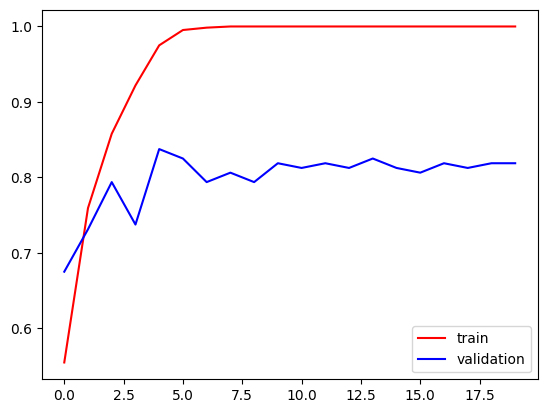

In [37]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

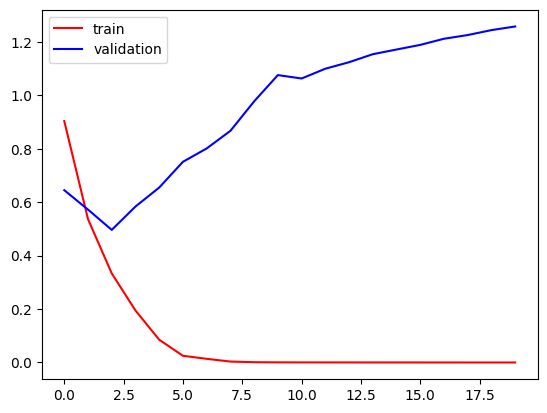

In [38]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [39]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [40]:
#predict the test data
predictions = model.predict(test_data)


32/32 ━━━━━━━━━━━━━━━━━━━━ 167s 5s/step


In [41]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[258 242]
 [247 253]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.52      0.51       500
           1       0.51      0.51      0.51       500

    accuracy                           0.51      1000
   macro avg       0.51      0.51      0.51      1000
weighted avg       0.51      0.51      0.51      1000



In [42]:
# create CNN model

model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu')) #feature reduction
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(1,activation='sigmoid'))  #output layer

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [44]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 22s 405ms/step - accuracy: 0.5711 - loss: 8.4198 - val_accuracy: 0.5000 - val_loss: 7.4930
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 198ms/step - accuracy: 0.8309 - loss: 1.8198 - val_accuracy: 0.5562 - val_loss: 1.9650
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 251ms/step - accuracy: 0.8893 - loss: 1.1671 - val_accuracy: 0.5312 - val_loss: 2.2589
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 205ms/step - accuracy: 0.9334 - loss: 0.8437 - val_accuracy: 0.5000 - val_loss: 5.0964
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 209ms/step - accuracy: 0.9413 - loss: 0.5369 - val_accuracy: 0.4938 - val_loss: 3.9349
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 259ms/step - accuracy: 0.9324 - loss: 0.8475 - val_accuracy: 0.5000 - val_loss: 16.4418
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 202ms/step - accuracy: 0.9455 - loss: 0.6564 - val_accuracy: 0.5000 - val_loss: 33.2862
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 239ms/step - accuracy: 0.9585 - loss: 0.5095 - val_accuracy:

In [52]:
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 1000 images belonging to 2 classes.


In [46]:
predictions = model.predict(test_data)

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 170ms/step


In [47]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[386 114]
 [400 100]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.49      0.77      0.60       500
           1       0.47      0.20      0.28       500

    accuracy                           0.49      1000
   macro avg       0.48      0.49      0.44      1000
weighted avg       0.48      0.49      0.44      1000



In [48]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()    #ResNet50 is a pre-trained model
pretrained_model = tf.keras.applications.ResNet50(include_top = False, #because i have my own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet50 is not trainable; keep those weights; I am going to add my own i/p and other layers

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [49]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [50]:
history = resnet_model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 23s 432ms/step - accuracy: 0.4770 - loss: 4.6707 - val_accuracy: 0.7750 - val_loss: 0.5481
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 257ms/step - accuracy: 0.7397 - loss: 0.7701 - val_accuracy: 0.7812 - val_loss: 0.4635
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 218ms/step - accuracy: 0.7894 - loss: 0.4453 - val_accuracy: 0.6000 - val_loss: 0.8845
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 238ms/step - accuracy: 0.7920 - loss: 0.4376 - val_accuracy: 0.8125 - val_loss: 0.4167
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 6s 282ms/step - accuracy: 0.8756 - loss: 0.2865 - val_accuracy: 0.7625 - val_loss: 0.4119
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 212ms/step - accuracy: 0.8775 - loss: 0.2880 - val_accuracy: 0.8062 - val_loss: 0.4148
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 220ms/step - accuracy: 0.8724 - loss: 0.2977 - val_accuracy: 0.7937 - val_loss: 0.4014
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 216ms/step - accuracy: 0.8633 - loss: 0.3150 - val_accuracy: 0

In [51]:
predictions = resnet_model.predict(test_data)

 6/32 ━━━━━━━━━━━━━━━━━━━━ 3s 153ms/step

/usr/local/lib/python3.11/dist-packages/PIL/Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 350ms/step


In [53]:
from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  # Adjust the threshold as needed

# Calculate confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Print classification report
print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[227 273]
 [256 244]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.47      0.45      0.46       500
           1       0.47      0.49      0.48       500

    accuracy                           0.47      1000
   macro avg       0.47      0.47      0.47      1000
weighted avg       0.47      0.47      0.47      1000

